In [18]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.models as models

from core.dataset import get_train_val
import core.config as conf

import utils.utils as utils

import numpy as np


In [9]:
multi_mic = conf.logmelspectro['multi_mic']

In [14]:
data_train, data_val = get_train_val(from_h5=True)

train_loader = DataLoader(data_train, batch_size=1, shuffle=False)

data_sample = next(iter(train_loader))

for sample in data_sample:
    print(sample.shape)

torch.Size([1, 16, 960, 64])
torch.Size([1, 1, 11])
torch.Size([1, 1, 3, 224, 224])


In [15]:
frame_img = data_sample[-1].squeeze(1)

torch.Size([1, 3, 224, 224])

In [47]:
model = models.vgg11(pretrained=False)

# # we will save the conv layer weights in this list
# model_weights =[]
# #we will save the 49 conv layers in this list
# conv_layers = []
# # get all the model children as list
# model_children = list(model.children())
# #counter to keep count of the conv layers
# counter = 0
# #append all the conv layers and their respective wights to the list
# i=0
# while i < len(model_children):
#     if type(model_children[i]) == nn.Conv2d:
#         counter+=1
#         model_weights.append(model_children[i].weight)
#         conv_layers.append(model_children[i])
#     if type(model_children[i]) == nn.Sequential:
#         j=0
#         while j < len(model_children[i]):
#             child = model_children[i][j]
#             if type(child) == nn.Conv2d:               
#                 counter+=1
#                 model_weights.append(child.weight)
#                 conv_layers.append(child)
#                 # print(child)
#             j+=1
#     i+=1
# print(f"Total convolution layers: {counter}")
# print(conv_layers)

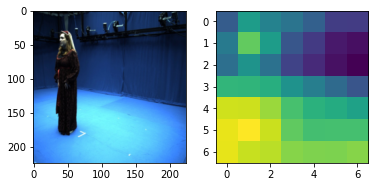

In [48]:

net_new = model.features

for layer in net_new:
    if isinstance(layer, nn.Conv2d):
        layer.requires_grad_ = False

out = net_new(frame_img)

out.squeeze_(0)

out = out.mean(dim=0).detach().numpy()

import matplotlib.pyplot as plt
plt.figure()
plt.subplot(122)
plt.imshow(out, aspect='equal')
plt.subplot(121)
plt.imshow(frame_img[0].permute(1,2,0), aspect='equal')
plt.show()

In [51]:
a = not False

In [52]:
a

True